In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
!nvidia-smi

Fri Dec 22 06:48:57 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/cottenseedpredit/data/train'
valid_path = '/content/drive/MyDrive/cottenseedpredit/data/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/cottenseedpredit/data/train/*')

In [ ]:
folders

['/content/drive/MyDrive/cottenseedpredit/data/train/diseased cotton leaf',
 '/content/drive/MyDrive/cottenseedpredit/data/train/fresh cotton leaf',
 '/content/drive/MyDrive/cottenseedpredit/data/train/diseased cotton plant',
 '/content/drive/MyDrive/cottenseedpredit/data/train/fresh cotton plant']

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cottenseedpredit/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')
training_set

Found 1951 images belonging to 4 classes.


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

ctest_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cottenseedpredit/data/test',
                                            target_size=(224, 224),
                                            batch_size=16,
                                            class_mode='categorical')

# Get the class indices from the existing test set
class_indices = ctest_set.class_indices

# Specify the desired classes
desired_folders = ['diseased cotton leaf', 'diseased cotton plant', 'fresh cotton leaf', 'fresh cotton plant']

# Filter out unwanted classes
selected_class_indices = {class_name: class_index for class_name, class_index in class_indices.items() if class_name in desired_folders}

# Create a new test set using only the desired classes
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cottenseedpredit/data/test',
                                                   target_size=(224, 224),
                                                   batch_size=16,
                                                   class_mode='categorical',
                                                   classes=selected_class_indices)

# Now you can use the updated_test_set for further processing


Found 36 images belonging to 5 classes.
Found 18 images belonging to 4 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-16-035a1a4a0022>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30
122/122 [==============================] - 1187s 10s/step - loss: 2.1672 - accuracy: 0.7658 - val_loss: 0.0717 - val_accuracy: 0.9444
Epoch 2/30
122/122 [==============================] - 38s 316ms/step - loss: 0.9728 - accuracy: 0.8770 - val_loss: 0.0907 - val_accuracy: 0.9444
Epoch 3/30
122/122 [==============================] - 39s 320ms/step - loss: 0.9549 - accuracy: 0.8970 - val_loss: 0.0957 - val_accuracy: 0.8889
Epoch 4/30
122/122 [==============================] - 38s 308ms/step - loss: 0.9099 - accuracy: 0.9047 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 5/30
122/122 [==============================] - 39s 318ms/step - loss: 0.8980 - accuracy: 0.9195 - val_loss: 1.7809e-04 - val_accuracy: 1.0000
Epoch 6/30
122/122 [==============================] - 37s 306ms/step - loss: 0.8810 - accuracy: 0.9216 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 7/30
122/122 [==============================] - 39s 317ms/step - loss: 0.6514 - accuracy: 0.9359 - val_loss: 4.6483e-04 

In [ ]:
import matplotlib.pyplot as plt

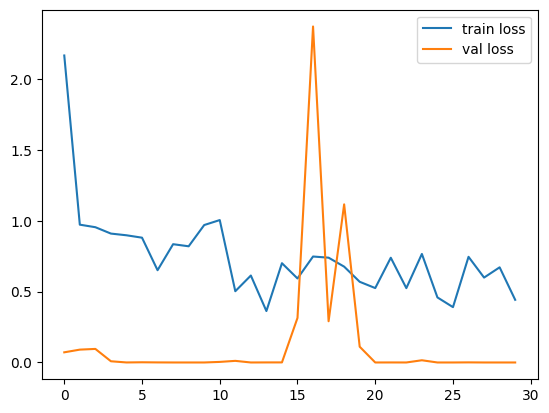

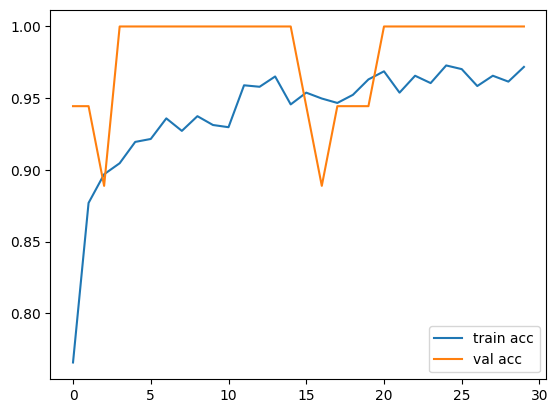

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/saved models/cottonpredit_model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved_models/cottonpredit_model.h5')


In [ ]:
model = load_model('/content/drive/MyDrive/saved_models/cottonpredit_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
y_pred = model.predict(test_set)
y_pred

2/2 [==============================] - 3s 164ms/step


array([[0.0000000e+00, 3.2826067e-13, 8.2945404e-36, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.5305516e-28, 9.7518914e-24, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 2.8273582e-34, 8.1502193e-16],
       [1.6845741e-08, 1.7747625e-28, 1.0000000e+00, 9.8039590e-17],
       [0.0000000e+00, 3.7355458e-30, 0.0000000e+00, 1.0000000e+00],
       [2.4378134e-38, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.4164252e-36, 4.1047034e-35, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 9.7150090e-34],
       [9.8917691e-21, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [3.7127909e-28, 7.9756238e-29, 1.0000000e+00, 1.0760428e-18],
       [1.0000000e+00, 1.4048096e-21, 0.0000000e+00, 4.4872763e-33],
       [0.0000000e+00, 1.0000000e+